Name: Kieran Fitzmaurice

# Glycolysis

(Adapted from textbook exercise 6.12)

The biochemical process of *glycolysis*, the breakdown of glucose in the body to release energy, can be modeled by the equations
$$\frac{dx}{dt} = -x + ay + x^2 y, \qquad \frac{dy}{dt} = b - ay - x^2 y\,.$$
Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P, and $a$ and $b$ are positive constants.  One of the important features of nonlinear equations like these is their *stationary points*, meaning values of $x$ and $y$ at which the derivatives of both variables become zero simultaneously, so that the variables stop changing and become constant in time. Setting the derivatives to zero above, the stationary points of our glycolysis equations are solutions of
$$-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0\,.$$

- Write a program to solve these for the stationary point using the **relaxation method** with $a=1$ and $b=2$. You will need to find a way to rewrite the equations above so that the solution converges. You should code your own solver, since `scipy` doesn't include any routines that will solve multiple equations using the relaxation method (probably because the relaxation method is trivial to code).

In [1]:
import numpy as np

a = 1
b = 2

f1 = lambda x,y: a*y + y*x**2
f2 = lambda x,y: b/(a+x**2)

x = 0.5
y = 0.5

for i in range(0,100):
    x = f1(x,y)
    y = f2(x,y)

print(x,y)

2.0 0.4


# Wien's Displacement Constant

(Adapted from textbook exercise 6.13)

Planck's radiation law tells us that the intensity of radiation per unit area and per unit wavelength $\lambda$
from a black body at temperature $T$ is
$$I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_BT}-1}\,,$$
where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

The wavelength $\lambda$ at which the emitted radiation is strongest is the solution of the equation
$$5 e^{-hc/\lambda k_BT} + \frac{hc}{\lambda k_BT} - 5 = 0\,.$$

Making the substitution $x=hc/\lambda k_BT$, we see that the wavelength of maximum radiation obeys the *Wien displacement law*:
$$\lambda = \frac{b}{T}\,,$$
where the so-called *Wien displacement constant* is $b=hc/k_Bx$, and $x$ is the solution to the nonlinear equation
$$5 e^{-x} + x - 5 = 0\,.$$

- Write a program to solve this equation to an accuracy of $\epsilon=10^{-6}$ using the **binary search method**, and hence find a value for the displacement constant.


- The displacement law is the basis for the method of *optical pyrometry*, a method for measuring the temperatures of objects by observing the color of the thermal radiation they emit. The method is commonly used to estimate the surface temperatures of astronomical bodies, such as the Sun. The wavelength peak in the Sun's emitted radiation falls at $\lambda=502$ nm. From the equations above and your value of the displacement constant, estimate the surface temperature of the Sun.

In [2]:
%reset -f

In [3]:
import numpy as np
import scipy.optimize as so

def binary_search(f,x1,x2,tol):
    xprime = 0.5*(x1+x2)
    while abs(f(xprime)) > tol:
        if np.sign(f(xprime)) == np.sign(f(x1)):
            x1 = xprime
        else:
            x2 = xprime
        xprime = 0.5*(x1+x2)        
        
    return(xprime)

f = lambda x: 5*np.exp(-1*x) + x - 5
x = binary_search(f,2.5,7.5,1e-6)

h = 6.62607004e-34 #Planck's Constant
c = 3.00e8 #Speed of light
k = 1.38064852e-23 #Boltzmann Constant
lam = 502e-9 #Wavelength of max intensity
b = h*c/(k*x)
T = b/lam

print("Temperature of sun = %lf K" % T)

Temperature of sun = 5776.451772 K


# The Roots of a Polynomial

(Adapted from textbook exercise 6.15)

Consider the sixth-order polynomial
$$P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1\,.$$
There is no general formula for the roots of a sixth-order polynomial, but one can find them easily enough using a computer.

- Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find rough values for the six roots of the polynomial - the points at which the function is zero.

In [4]:
%reset -f

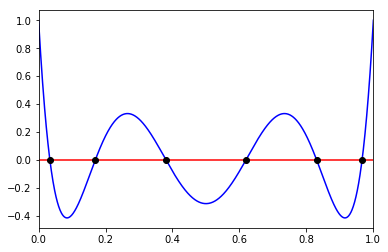

Roots:
0.0337652429
0.1693953068
0.3806904070
0.6193095930
0.8306046932
0.9662347571


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so


P = lambda x: 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
Pprime = lambda x: 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x - 42

x = np.linspace(0,1,1000)
plt.plot(x,P(x),'b-',[0,1],[0,0],'r-')
plt.axis(xmin = 0,xmax = 1)

def Newton_Method(f,fprime,x1,tol):
    x2 = x1 - f(x1)/fprime(x1)
    while abs(f(x2)) > tol:
        x1 = x2
        x2 = x1 - f(x1)/fprime(x1)
    return(x2)

r1 = Newton_Method(P,Pprime,0.04,1e-10)
r2 = Newton_Method(P,Pprime,0.18,1e-10)
r3 = Newton_Method(P,Pprime,0.4,1e-10)
r4 = Newton_Method(P,Pprime,0.65,1e-10)
r5 = Newton_Method(P,Pprime,0.85,1e-10)
r6 = Newton_Method(P,Pprime,0.95,1e-10)

plt.plot([r1,r2,r3,r4,r5,r6],[0,0,0,0,0,0],'ko')
plt.show()

print("Roots:\n%.10lf\n%.10lf\n%.10lf\n%.10lf\n%.10lf\n%.10lf"% (r1,r2,r3,r4,r5,r6))



- Write a Python program to solve for the positions of all six roots to at least ten decimal places of accuracy, using **Newton's method**.

Note that the polynomial in this example is just the sixth Legendre polynomial (mapped onto the interval from zero to one), so the calculation performed here is the same as finding the integration points for 6-point
Gaussian quadrature, and indeed Newton's method is the method of choice for calculating Gaussian quadrature points.

In [6]:
#your code here


# The Temperature of a Light Bulb

(Adapted from textbook exercise 6.18)

An incandescent light bulb is a simple device - it contains a filament, usually made of tungsten, heated by the flow of electricity until it becomes hot enough to radiate thermally. Essentially all of the power consumed by such a bulb is radiated as electromagnetic energy, but some of the radiation is not in the visible wavelengths, which means it is useless for lighting purposes.

Let us define the efficiency of a light bulb to be the fraction of the radiated energy that falls in the visible band. It's a good approximation to assume that the radiation from a filament at temperature $T$ obeys the Planck radiation law, meaning that the power radiated per unit wavelength $\lambda$ obeys
$$I(\lambda) = 2\pi A hc^2 \frac{\lambda^{-5}}{e^{hc/\lambda k_BT}-1}\,,$$
where $A$ is the surface area of the filament, $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant. The visible wavelengths run from $\lambda_1=390$ nm to $\lambda_2=750$ nm, so the total energy radiated in the visible window is $\int_{\lambda_1}^{\lambda_2} I(\lambda)\,d\lambda$ and the total energy
at all wavelengths is $\int_0^\infty I(\lambda)\,d\lambda$. Dividing one expression by the other and substituting for $I(\lambda)$ from above, we get an expression for the efficiency $\eta$ of the light bulb thus:
$$\eta = \frac{\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/(e^{hc/\lambda k_BT}-1) \,d\lambda}{\int_0^\infty \lambda^{-5}/(e^{hc/\lambda k_BT}-1) \,d\lambda}\,,$$
where the leading constants and the area $A$ have canceled out. Making the substitution $x=hc/\lambda k_BT$, this can also be written as
$$\eta = \frac{\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT} x^3/(e^x-1) \,dx}{\int_0^\infty x^3/(e^x-1) \,dx} = \frac{15}{\pi^4}\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT}\frac{x^3}{e^x-1} \,dx\,,$$
where we have made use of the known exact value of the integral in the denominator.

- Write a Python function that takes a temperature $T$ as its argument and calculates the value of $\eta$ for that temperature from the formula above. The integral in the formula cannot be done analytically, but you can do it numerically using any method of your choice.


- Use your function to make a graph of $\eta$ as a function of temperature between 300 K and $10\,000$ K. You should see that there is an intermediate temperature where the efficiency is a maximum.

In [7]:
%reset -f

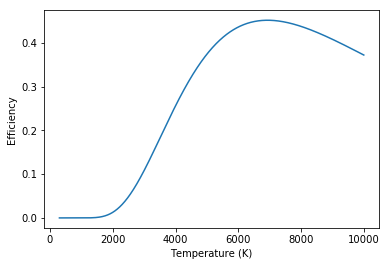

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import scipy.optimize as so

def efficiency(T):
    
    f = lambda x: x**3/(np.exp(x)-1)
    
    h = 6.62607004e-34 #Planck's Constant
    c = 3.00e8 #Speed of light
    k = 1.38064852e-23 #Boltzmann Constant
    lam1 = 390e-9
    lam2 = 750e-9
    
    I,err = si.quad(f,h*c/(lam2*k*T),h*c/(lam1*k*T))
    eff = 15/np.pi**4*I
    return(eff)
    
temps = np.linspace(300,10000,1000)
eff = np.zeros(1000)

for i,T in enumerate(temps):
    eff[i] = efficiency(T)
    
plt.plot(temps,eff)
plt.xlabel("Temperature (K)")
plt.ylabel("Efficiency")
plt.show()

- Calculate the temperature of maximum efficiency of the light bulb to within 1 K using **golden ratio search**.
> Hint: An accuracy of 1 K is the equivalent of a few parts in ten thousand in this case. To get this kind of accuracy in your calculation you'll need to use values for the fundamental constants that are suitably accurate, i.e., you will need values accurate to several significant figures.

In [9]:
f = lambda T: -1*efficiency(T)
sol = so.golden(f,brack = (6000,7000,8000))

print("Most Efficient Temperature =",sol,"K")

Most Efficient Temperature = 6933.375724679134 K
